<a href="https://colab.research.google.com/github/DangTrungNhut/Artificial_Intelligence_Course/blob/main/GK_VN_banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

#Kết nối với drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Giai nén tập dữ liệu rar
!apt-get install -y unrar

rar_file_path = "/content/drive/MyDrive/AI/data/money/money.rar" 
extract_path = "/content/drive/MyDrive/AI/data/money" 
!unrar x '{rar_file_path}' '{extract_path}'

In [ ]:
# Khai báo các thông số cho việc train mô hình
batch_size = 64
epochs = 25
num_classes = 7
input_shape = (150, 150, 3)

In [ ]:
# Chuẩn bị dữ liệu huấn luyện và xác thực
train_data = '/content/drive/MyDrive/AI/data/money/money/money'
valid_data = '/content/drive/MyDrive/AI/data/money/money/test_money'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset = train_datagen.flow_from_directory(train_data, target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')

Found 1118 images belonging to 7 classes.


In [ ]:
validation_dataset = validation_datagen.flow_from_directory(valid_data, target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')

Found 746 images belonging to 7 classes.


In [ ]:
train_dataset.class_indices

{'10000': 0,
 '100000': 1,
 '20000': 2,
 '200000': 3,
 '5000': 4,
 '50000': 5,
 '500000': 6}

In [ ]:
# Xây dựng mô hình CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

In [ ]:
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
history = model.fit(train_dataset,epochs=epochs, validation_data=validation_dataset)

Epoch 1/25
18/18 [==============================] - 36s 2s/step - loss: 2.1369 - accuracy: 0.1896 - val_loss: 2.0001 - val_accuracy: 0.1783
Epoch 2/25
18/18 [==============================] - 11s 599ms/step - loss: 1.6083 - accuracy: 0.3810 - val_loss: 2.6577 - val_accuracy: 0.2507
Epoch 3/25
18/18 [==============================] - 11s 621ms/step - loss: 1.1449 - accuracy: 0.5930 - val_loss: 2.6843 - val_accuracy: 0.3244
Epoch 4/25
18/18 [==============================] - 11s 597ms/step - loss: 0.8021 - accuracy: 0.7066 - val_loss: 2.6369 - val_accuracy: 0.3928
Epoch 5/25
18/18 [==============================] - 10s 575ms/step - loss: 0.4825 - accuracy: 0.8372 - val_loss: 3.0025 - val_accuracy: 0.2802
Epoch 6/25
18/18 [==============================] - 10s 558ms/step - loss: 0.4238 - accuracy: 0.8470 - val_loss: 2.7464 - val_accuracy: 0.4236
Epoch 7/25
18/18 [==============================] - 12s 657ms/step - loss: 0.2650 - accuracy: 0.9061 - val_loss: 2.7926 - val_accuracy: 0.4625
Ep

In [ ]:

# Save model
model.save('/content/drive/MyDrive/AI/Report/vnbank_final.h5')

In [ ]:
from keras.models import load_model
classification_bank_model = load_model('/content/drive/MyDrive/AI/Report/vnbank_final.h5')

In [ ]:
score=classification_bank_model.evaluate(validation_dataset, verbose=0)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

Test loss =  4.7325239181518555
Test accuracy =  0.4611259996891022


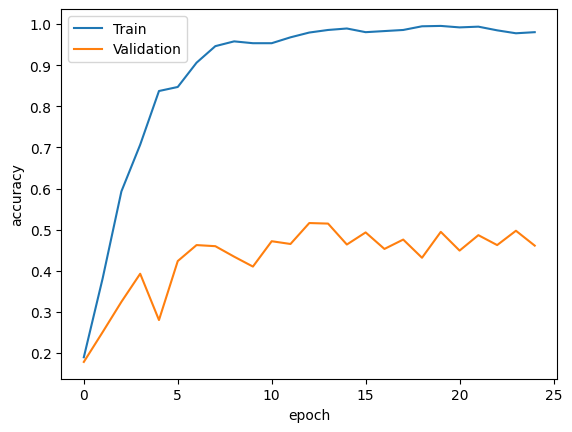

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 63ms/step
Predict is:  10000


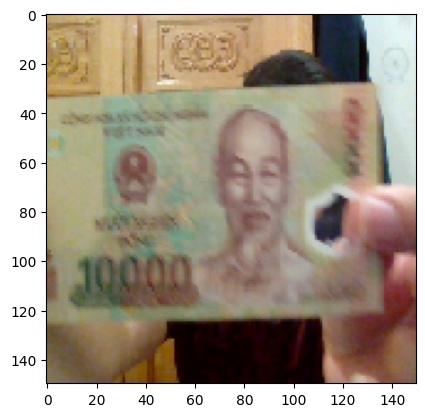

In [ ]:
img = load_img('/content/drive/MyDrive/AI/data/money/money/test_money/10000/108.png',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['10000','100000','20000', '200000','5000','50000','500000']
print('Predict is: ',Label[int(np.argmax(classification_bank_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 27ms/step
Predict is:  200000


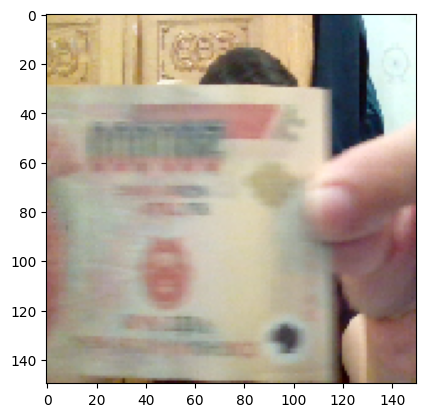

In [ ]:
img = load_img('/content/drive/MyDrive/AI/data/money/money/test_money/200000/155.png',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['10000','100000','20000', '200000','5000','50000','500000']
print('Predict is: ',Label[int(np.argmax(classification_bank_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 42ms/step
Predict is:  500000


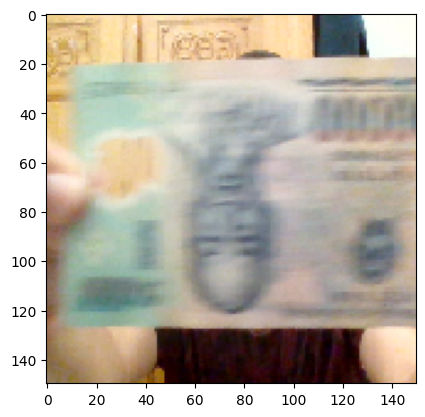

In [ ]:
img = load_img('/content/drive/MyDrive/AI/data/money/money/test_money/500000/178.png',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['10000','100000','20000', '200000','5000','50000','500000']
print('Predict is: ',Label[int(np.argmax(classification_bank_model.predict(img),axis=-1))])